<font size="6"><center>
CSC 723 Final Project
</center></font>

Final Project Code

&emsp; Version 3.0<br> 
&emsp; March 2023

&emsp; CSC 723<br>
&emsp; Machine Learning for Cyber Security<br>
&emsp; Dakota State University

Kiera Conway<br>
Robert Chavez


*Note:*<br>
This notebook is an edited and consolidated version of the following three notebooks:
- [CSC 723 - Naive Bayes](https://www.kaggle.com/code/kieraconway/csc-723-naive-bayes)
- [CSC 723 - Decision Tree/Random Forest](https://www.kaggle.com/code/kieraconway/csc-723-decision-tree-random-forest)
- [CSC 723 - KNN](https://www.kaggle.com/code/kieraconway/csc-723-knn)


# Data Configuration

## Import Data
### Libraries

In [1]:
import numpy as np   # array mathematical operations library
import pandas as pd  # data analysis library3
import math          # mathematical functions defined by C standard

### Data Set

In [2]:
# Set File Path
file_path = '/kaggle/input/spam-or-ham/SMSCollection.csv'

# Obtain Data from File Path
sms_data = pd.read_csv(file_path)

## Review Dataset
### Dataset Information

In [3]:
# General Information
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# Check for null values
sms_data.isnull().sum()

Class    0
sms      0
dtype: int64

In [5]:
# View first and last 5 Observations
sms_data

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# View Example Message
print(sms_data.Class[42])      # view variable 2 (message) of 72nd message
print(sms_data.sms[42])      # view variable 1 (spam/ham) of 72nd message

spam
07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow


In [7]:
# Statistical Information
sms_data.describe()

,Class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Analyze Information

#### <u>.describe() Key</u>

| Title  | Definition                                 | 
| ------ | --------                                   |
| Count  | Count/Occurences of each feature           | 
| Unique | The number of possible unique observations |
| Top    | The most frequent value                    | 
| Freq   | The frequency of the top value             | 

#### <u>Data Analysis</u>

The features of this dataset are 'Class' and 'sms', where 'Class' indicates whether the message is `spam` or a valid sms message, `ham` and 'sms' contains the corresponding message.

The count values above shows us there are 5572 non-null data enteries in each feature. As each feature contains the same count value, we can conclude there are no missing data points that we need to trim. 

The unique value of 2 under the Class feature verifies all messages are either `spam` or `ham`, and contain no erroneous values. Since the sms feature contains a unique value of 5169, which is less than 5572, we can assume that some messages are identical.

The top and freq values under Class show us that most messages are categorized as `ham`, with 4825 occurrences. We can therefore determine there are 747 remaining messages categorized as `spam`. The top and freq values under sms confirm the previous hypothesis that some messages are identical; we can see that the most frequent message, occurring  30 times, contains the text "Sorry, I'll call later"

Using this information, we can identify the format of our data, determine its completeness, and verify the values contained are expected.

## Modify Data
### Create Column: Numerical Representation for Spam/Ham

In [8]:
# Observe Unique Values
print(sms_data['Class'].unique())

['ham' 'spam']


In [9]:
# View first 5 Observations
print("Before Modification:\n") 
sms_data.head()

Before Modification:



,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Execute Mapping to New Column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()                                         # Create Instance
sms_data['is_spam'] = le.fit_transform(sms_data['Class'])   # Ham becomes 0, Spam becomes 1

# View first 5 Observations
print("After Modification:\n") 
sms_data.head()

After Modification:



,Class,sms,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
# Identify Mapping 
le.classes_

array(['ham', 'spam'], dtype=object)

####  Mapping Transition
By accessing the le instance, we can view the position of each variable and determine their numerical representations. This mapping transition is listed below

* ham&ensp;  -  0
* spam  -  1

### Create Column: Message Lengths

In [12]:
# View first 5 Observations
print("Before Modification:\n") 
sms_data.head()

Before Modification:



,Class,sms,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
# Create New Column
sms_data['sms_len'] = sms_data.sms.apply(len)   #apply length counter to each tweet 

# View first 5 Observations
print("After Modification:\n") 
sms_data.head()

After Modification:



,Class,sms,is_spam,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


## Graph Data
### Bar Graph

Text(0.5, 0, 'Message Length')

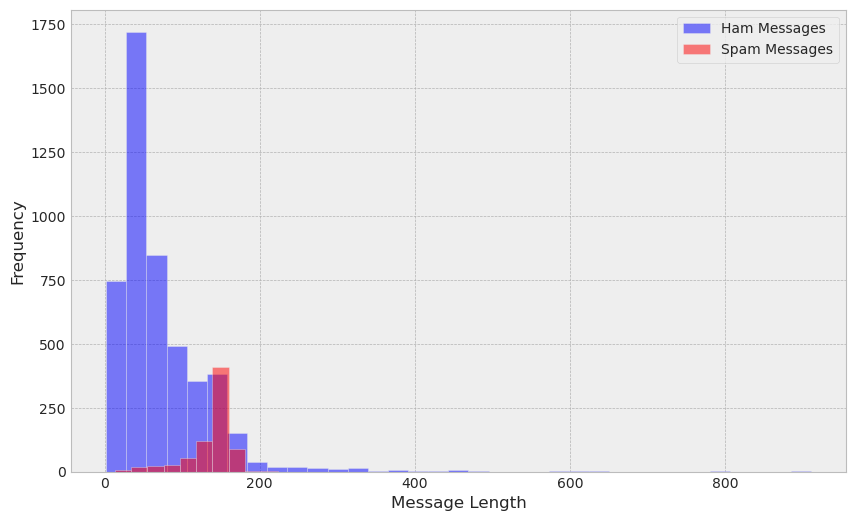

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns              #statistical data visualization

sns.set_style('whitegrid')          #set visual style
plt.style.use('bmh')                #set plot visual style
plt.figure(figsize=(10, 6))         #set plot size

# Plot Ham/ Spam Message Length as Histogram
sms_data[sms_data.Class=='ham'].sms_len.plot(bins=35, kind='hist', color='blue', label='Ham Messages', alpha=0.5)
sms_data[sms_data.Class=='spam'].sms_len.plot(kind='hist', color='red', label='Spam Messages', alpha=0.5)

plt.legend()
plt.xlabel("Message Length")

## Box and Whiskers

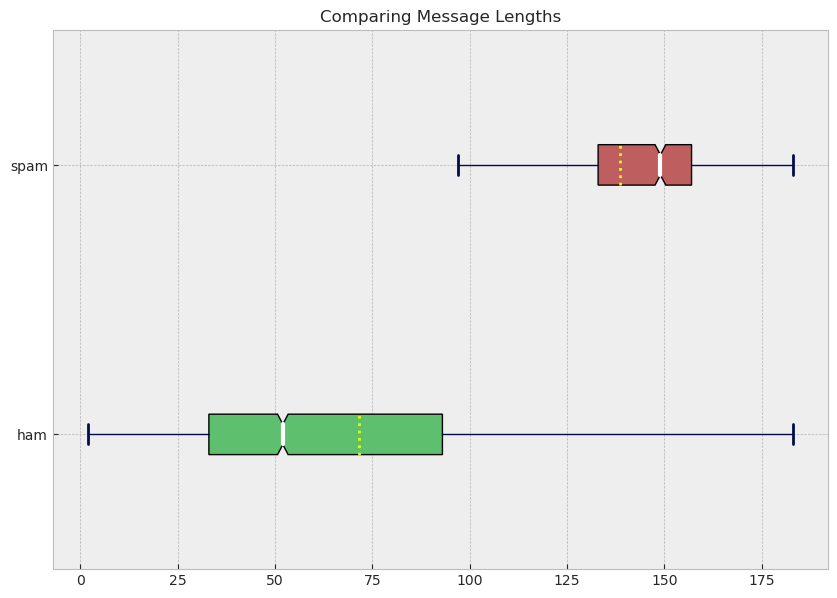

In [15]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Separate Datasets
ham_len= sms_data[sms_data.Class=='ham'].sms_len
spam_len= sms_data[sms_data.Class=='spam'].sms_len
all_len = [ham_len, spam_len]

# Define Figure
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(all_len, showmeans=True, meanline=True, patch_artist = True, 
                notch ='True', showfliers=False, vert = 0)

# Define Colors for boxes
colors = ['#5ebf6e','#bf5e5e']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Define whisker style
for whisker in bp['whiskers']:
    whisker.set(color ='#040b4a',
                linewidth = 1,
                linestyle ="-")

# Define caps style
for cap in bp['caps']:
    cap.set(color ='#040b4a',
            linewidth = 2)

# Define median style
for median in bp['medians']:
    median.set(color ='#FFFFFF',
               linewidth = 3)

# Define mean style
for mean in bp['means']:
    mean.set(color ='#e1ff00',
             linewidth = 2,
             linestyle =":")
     
# x-axis labels
ax.set_yticklabels(['ham', 'spam'], 
                   fontsize=10)
 
# Adding title
plt.title("Comparing Message Lengths", 
          fontsize=12)
 
# Add bottom and left axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

## Analyze Data
### Complete Data Set

In [16]:
sms_data.describe()

,is_spam,sms_len
count,5572.000000,5572.000000
mean,0.134063,80.489950
std,0.340751,59.942907
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,62.000000
75%,0.000000,122.000000
max,1.000000,910.000000


#### Analysis (Complete Data Set)


* Data set includes Ham (0) and Spam (1) combined into is_spam
* A is_spam mean of 0.134 means that 13.4% of data is spam
    * Inversely, 86.6% is Ham
* SMS messages average 80.48 characters
* The shortest message length is 2 characters
* The longest message length is 910 characters


### Ham Data Set

In [17]:
# Analyze data labeled 'ham'
sms_data[sms_data.Class=='ham'].describe()

,is_spam,sms_len
count,4825.0,4825.000000
mean,0.0,71.482487
std,0.0,58.440652
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,93.000000
max,0.0,910.000000


#### Analysis (Ham Data Set)


* This data set includes Ham (0) only
* There are 4,825 ham messages
* Remember, ham is 0, so all other stats in is_spam will == 0
* Ham messages average 71.48 characters
* The shortest ham message length is 2 characters
* The longest ham message length is 910 characters

### Spam Data Set

In [18]:
# Analyze data labeled 'spam'
sms_data[sms_data.Class=='spam'].describe()

,is_spam,sms_len
count,747.0,747.000000
mean,1.0,138.670683
std,0.0,28.873603
min,1.0,13.000000
25%,1.0,133.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,223.000000


#### Analysis (Spam Data Set)


* This data set includes Spam (1) only
* There are 747 spam messages
* Remember, spam is 1, so all other stats (except std) in is_spam will == 1
    * Standard Deviation (std) will equal 0 as there is no deviation between 1 and 1
* Spam messages average 138.67 characters
* The shortest spam message length is 13 characters
* The longest spam message length is 223 characters

## Prepare Data using Natural Language Processing
### <a id=wordnet>Install wordnet </a>

<div class="alert alert-block alert-info">
    <b>[1]:</b>

Unless previously installed, `nltk`'s `WordNetLemmatizer` in the [Process_Msg](#process) function below will result in `LookupError : "Resource 'corpora/wordnet' not found."` If that error occurs, read directions in the following cell to install and unzip the module - if no error appears, continue to the [Process_Msg](#process) function
</div>

### <a id=process>Create Function to Clean up Messages</a>

In [19]:
# #                                                          #
# #                            Note                          #
# #                                                          #
# #   If the LookupError occurs, 'Fix 1' attempts to unzip   #
# #     the file, as this alone should be enough to fix      #
# #   the problem. However, if the issue persists, 'Fix 2'   # 
# #  will install the module first and then unzip the file.  #  
# #                                                          #
# #    Please note that 'Fix 1' and 'Fix 2' should be run    #
# #    individually as they both unzip the file. As such,    #
# #  fix 1 is commented out by default to avoid redundancy.  #
# #                                                          #
# #     This fix only needs to be ran once per session to    #
# # resolve the LookupError issue., and can be commented out #
# #  for sequential rerunning of code. For all consecutive   #
# #     sessions, uncomment the appropriate fix based on     #
# #                  your needs and run once                 #

'# # # # # # # # # # # # # # # #'
'# #  FIX ONE: unzip wordnet # #'
'# # # # # # # # # # # # # # # #'

# #unzip wordnet
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

# #                                                          #
# #      Note: If the above line is uncommented and the      # 
# #     code is hanging, it means it is already unzipped.    # 
# #       Either restart the kernel, or comment out the      # 
# #               unzip function and `Run All`               #
# #                                                          #

' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '

'# # # # # # # # # # # # # # # # # # # # # #'
'# #  FIX TWO: install and unzip wordnet # #'
'# # # # # # # # # # # # # # # # # # # # # #'

# #install wordnet
# import nltk
# nltk.data.path.append('/kaggle/working/nltk_data')
# nltk.download('wordnet', download_dir='/kaggle/working/nltk_data')

# #unzip wordnet
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

'# # # # # # # # # # # # # # # # # # # # # #'

In [20]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import string
import re

def Process_Msg(sms):
   
    STOPWORDS = stopwords.words('english')   #set stopwords (SW) variable to nltk english SW
    lemmatizer = WordNetLemmatizer()
    
    sms = re.sub(r'\(?\d{3}\)?[\s-]?\d{3}[\s-]?\d{4}', 'PhoneNumberID', sms)  #replace phone numbers with a special id  
    
    sms_modified = ''.join([char if char not in string.punctuation else ' ' for char in sms])    #remove punctuation 

    sms_tokenized = word_tokenize(sms_modified)
      
    sms_nostop = [word for word in sms_tokenized if word.lower() not in STOPWORDS]  #remove Stopwords
            
    sms_lemmatized = [lemmatizer.lemmatize(word) for word in sms_nostop]

    return sms_lemmatized


<div class="alert alert-block alert-info">
    <b>[2]:</b>
  
Possible Warnings and Errors:
* `LookupError : "Resource 'corpora/wordnet' not found."`
    * Fix: Go to [Install wordnet cell](#wordnet), read solution directions, uncomment cell accordingly, and run it. A Kernel restart may be required.
    * Note: It will be using sudo permissions to unzip a file. For more information, please visit [the offical wordnet module page](https://www.nltk.org/api/nltk.corpus.reader.wordnet.html).
<br><br>
* `ERROR: Could not find a version that satisfies the requirement chardet (from versions: none)`
* `ERROR: No matching distribution found for wordnet`
* `WARNING: There was an error checking the latest version of wordnet.`
    * Fix: Go to Notebook Settings (right-hand side), navigate to Notebook Options, and ensure internet access is enabled.
</div>

#### Code Breakdown
`sms = re.sub(r'\(?\d{3}\)?[\s-]?\d{3}[\s-]?\d{4}', 'PhoneNumberID', sms)` <br>
" search for possible phone number variations, <br>
if found in sms, <br>
replace with string 'PhoneNumberID', <br>
save it to sms "
* replaces phone numbers with universal PhoneNumberID
<br><br>

`sms_modified = ''.join([char if char not in string.punctuation else ' ' for char in sms])` <br>
" for every character in the message, <br>
if the character is not in the list of punctuation, <br>
save that char into the list 'nopunc' <br>
else, save it as a space"
* replaces punctuation with a space
* Essentially, nopunc is the same as sms, just without the punctuation
<br><br>

`sms_tokenized = word_tokenize(sms_modified)` <br>
" divide string into lists of substrings,
save as sms_tokenized "
* tokenizes the text data
<br><br>

`sms_nostop = [word for word in sms_tokenized if word.lower() not in STOPWORDS]`<br>
" for every word in the 'sms_tokenized' list,  <br>
if the lowercase word is not in 'STOPWORDS',  <br>
save to the list 'sms_nostop' "
* removes Stopwords
<br><br>

`sms_lemmatized = [lemmatizer.lemmatize(word) for word in sms_nostop]` <br>
" for every word in the 'sms_nostop' list,  <br>
reduce them to their base or root form',  <br>
save as sms_lemmatized "
* performs the lemmatization method

#### Example of Process_Msg Functionality

In [21]:
from prettytable import PrettyTable

# Sample message
spam_example = 'CALL NOW (123)230-2345 ! OR visit us AT www.kfkb.com to claim! We\'re waiting for your call 1232302345'

# Preprocess messages
processed_spam_example = Process_Msg(spam_example)

# Create table
y_stats_table = PrettyTable()
y_stats_table.field_names = ["Message Type", "Message"]
y_stats_table.add_row(["Spam", spam_example])
y_stats_table.add_row(["Processed Spam", processed_spam_example])

# Print table
print(y_stats_table)

+----------------+------------------------------------------------------------------------------------------------------------+
|  Message Type  |                                                  Message                                                   |
+----------------+------------------------------------------------------------------------------------------------------------+
|      Spam      |   CALL NOW (123)230-2345 ! OR visit us AT www.kfkb.com to claim! We're waiting for your call 1232302345    |
| Processed Spam | ['CALL', 'PhoneNumberID', 'visit', 'u', 'www', 'kfkb', 'com', 'claim', 'waiting', 'call', 'PhoneNumberID'] |
+----------------+------------------------------------------------------------------------------------------------------------+


### Create Column: Cleaned Messages

In [22]:
# View first 5 Observations
print("Before Modification:\n") 
sms_data.head()

Before Modification:



,Class,sms,is_spam,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [23]:
# Create New Column
sms_data['sms_clean'] = sms_data.sms.apply(Process_Msg)   #send each message to function 'Process_Msg'

# View first 5 Observations
print("After Modification:\n") 
sms_data.head()

After Modification:



,Class,sms,is_spam,sms_len,sms_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,0,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,"[Nah, think, go, usf, life, around, though]"


## Create Frequency Tables
### Ham Word Frequencies

In [24]:
# pip install git+https://github.com/jazzband/prettytable.git

In [25]:
from collections import Counter

# Create counter object for ham word frequency
ham_word_count = Counter()

# Extract ham words
ham_words = sms_data[sms_data.is_spam==0].sms_clean

# Update the counter
for each_word in ham_words:                #for each word in words
    ham_word_count.update(each_word)       #count frequency of each_word

# Create a table
ham_freq_table = PrettyTable(['Word', 'Count'])
ham_freq_table.title = "Ham Word Frequency"

# Update Table

top_ham = ham_word_count.most_common(25)        #save top 25
for each_word, freq in top_ham:                 #iterate through top 25
    ham_freq_table.add_row([each_word, freq])   #save to table

# Print Table
print(ham_freq_table)

+-------+-------+
|  Word | Count |
+-------+-------+
|   u   |  810  |
|   2   |  326  |
|   gt  |  318  |
|   lt  |  316  |
|  get  |  302  |
|   U   |  280  |
|   go  |  260  |
|  know |  238  |
|  come |  228  |
|  like |  225  |
|  call |  224  |
|  day  |  220  |
|  got  |  213  |
|  time |  202  |
|   ur  |  191  |
|   4   |  190  |
|  want |  173  |
|  lor  |  162  |
|  home |  160  |
|  need |  160  |
|  one  |  157  |
| going |  153  |
|  good |  152  |
|   Ok  |  150  |
|  love |  150  |
+-------+-------+


### Spam Word Frequencies

In [26]:
# Create counter object for spam word frequency
spam_word_count = Counter()

# Extract spam words
spam_words = sms_data[sms_data.is_spam==1].sms_clean

# Update the counter
for each_word in spam_words:                #for each word in words
    spam_word_count.update(each_word)       #count frequency of each_word

# Create a table
spam_freq_table = PrettyTable(['Word', 'Count'])

# Update Table
top_spam = spam_word_count.most_common(25)       #save top 25
for each_word, freq in top_spam:                 #iterate through top 25
    spam_freq_table.add_row([each_word, freq])   #save to table


# Print Table
print(spam_freq_table)

+----------------+-------+
|      Word      | Count |
+----------------+-------+
|      call      |  203  |
|       2        |  194  |
|      Call      |  138  |
|       4        |  133  |
|      FREE      |  117  |
|       ur       |  107  |
|       U        |  106  |
|     mobile     |  105  |
|      www       |   96  |
|      text      |   93  |
|     claim      |   80  |
|      txt       |   77  |
|     prize      |   76  |
|      Txt       |   75  |
|       u        |   74  |
|      150p      |   70  |
|      week      |   68  |
|      min       |   67  |
|      free      |   64  |
|      STOP      |   63  |
| PhoneNumberID0 |   62  |
|    service     |   62  |
| PhoneNumberID2 |   60  |
|     reply      |   59  |
|       1        |   58  |
+----------------+-------+


### Compare Word Frequencies

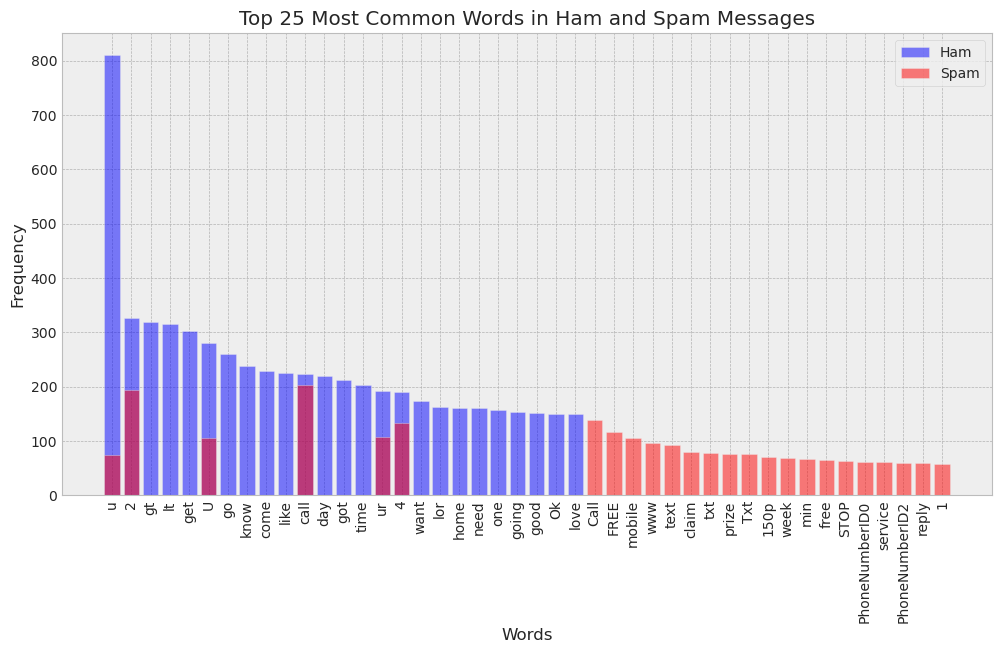

In [27]:
import matplotlib.pyplot as plt

# Extract words and frequencies
ham_words, ham_freqs = zip(*top_ham)
spam_words, spam_freqs = zip(*top_spam)

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the ham and spam word frequencies as bar charts
ax.bar(ham_words, ham_freqs, color='b', alpha=0.5, label='Ham')
ax.bar(spam_words, spam_freqs, color='r', alpha=0.5, label='Spam')

# Update table appearance
ax.set_title('Top 25 Most Common Words in Ham and Spam Messages')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
ax.legend()

# Display chart
plt.show()

#### <i> NLP Note </i> 
<i>This is a good place to check for additional stopwords.</i><br>
    
If unsure about adding a specific word to the stopwords list, ask if the word adds any context - if not, it would likely work well as a stopword.

## Standardize Data

Standardizing this dataset is not necessary as we know the min/max values (0, 1). The range of this scale indicates there are not any huge outliers; therefore, standardization is not necessary. As such, this is simply an example of how data would be standardize when necessary.

Furthermore, the data does not need to be scaled for the same reason (range of scale). As the function for scaling is:<br>
    
            X_scaled = X_stdev * (scale_max - scale_min) + scale_min 
<br>
A 0 to 1 scale is the same as multiplying by 1, and would provide no benefit. An example of this logic is shown below.<br><br>
    
Example:<br>
&emsp;&emsp;X_cs = X_stdev * (scale_max - scale_min) + scale_min<br>
&emsp;&emsp;X_cs = X_stdev * (1 - 0) + 0<br>
&emsp;&emsp;X_cs = X_stdev * (1) + 0<br>
&emsp;&emsp;X_cs = X_stdev + 0<br>
&emsp;&emsp;X_cs = X_stdev <br>

---

# Pre-Training Setup

## Define Variables
### Dependent Variable

In [28]:
# Create Vector for Dependent Variable
y = sms_data.is_spam

# View Dependent Variable
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: is_spam, Length: 5572, dtype: int64

### Independent Variable

In [29]:
# Create Matrix for Independent Variables
X = sms_data.sms_clean    #define feature set

# View Dependent Variable
X

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4             [Nah, think, go, usf, life, around, though]
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                             [Pity, mood, suggestion]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [Rofl, true, name]
Name: sms_clean, Length: 5572, dtype: object

### View Variable Shapes

In [30]:
print(X.shape)       #print shape (Observations/ Rows, Features/ Columns)
print(y.shape)       #print shape (Observations/ Rows, Features/ Columns)

(5572,)
(5572,)


#### Shape Analysis and Verification
* X: 5572 observations, 1 feature
* y: 5572 observations, 1 feature

Since Training and Testing observations match, and features are the expected value, we may proceed with splitting the training and testing data.

## Split Training and Testing Data

In [31]:
# Split data into 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42)

# View Training Data
print(f'X_train:\n{X_train}\n\ny_train:\n{y_train}')

X_train:
4281    [WINNER, valued, network, customer, selected, ...
585     [scotland, Hope, showing, JJC, tendency, Take,...
4545                                 [derek, done, class]
3034                                   [Aight, lem, know]
2758                       [Yo, watching, movie, netflix]
                              ...                        
3772    [Hi, wlcome, back, wonder, got, eaten, lion, s...
5191                                 [Sorry, call, later]
5226            [Prabha, soryda, realy, frm, heart, sory]
5390                        [Nt, joking, seriously, told]
860                         [say, somebody, named, tampa]
Name: sms_clean, Length: 4179, dtype: object

y_train:
4281    1
585     0
4545    0
3034    0
2758    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: is_spam, Length: 4179, dtype: int64


In [32]:
# Verify Training/ Testing Data
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4179,) (1393,)
(4179,) (1393,)


### Verification Analysis

* X_train: 4179 observations, 1 feature
* X_test: 1393 observations, 1 feature
* y_train: 4179 observations, 1 feature
* y_test: 1393 observations, 1 feature

Since Training and Testing observations match, and features are the expected value (missing means 1), the training and testing data was split correctly.

## Analyze Training and Testing Metrics for y

In [33]:
# define variable stats
line_break = " - - - - "
desc_y = {'count' : '{:0.0f}'.format(y.describe()[0]),
          'unique': y.nunique(),
          'top'   : y.mode().values[0],
          'freq'  : y.value_counts().max(),
          'break' : line_break,
          'mean'  : '{:0.4f}'.format(y.describe()[1].round(4)),
          'std'   : '{:0.4f}'.format(y.describe()[2].round(4)),
          'min'   : '{:0.4f}'.format(y.describe()[3]),
          '25'    : '{:0.4f}'.format(y.describe()[4].round(4)),
          '50'    : '{:0.4f}'.format(y.describe()[5].round(4)),
          '75'    : '{:0.4f}'.format(y.describe()[6].round(4)),
          'max'   : '{:0.4f}'.format(y.describe()[7].round(4))
}
desc_y_test = {'count' : '{:0.0f}'.format(y_test.describe()[0]), 
               'unique': y_test.nunique(), 
               'top'   : y_test.mode().values[0], 
               'freq'  : y_test.value_counts().max(),
               'break' : line_break,
               'mean'  : '{:0.4f}'.format(y_test.describe()[1].round(4)), 
               'std'   : '{:0.4f}'.format(y_test.describe()[2].round(4)), 
               'min'   : '{:0.4f}'.format(y_test.describe()[3]), 
               '25'    : '{:0.4f}'.format(y_test.describe()[4].round(4)), 
               '50'    : '{:0.4f}'.format(y_test.describe()[5].round(4)),
               '75'    : '{:0.4f}'.format(y_test.describe()[6].round(4)),
               'max'   : '{:0.4f}'.format(y_test.describe()[7].round(4))
}
desc_y_train = {'count' : '{:0.0f}'.format(y_train.describe()[0]),
               'unique': y_train.nunique(), 
               'top'   : y_train.mode().values[0], 
               'freq'  : y_train.value_counts().max(),
               'break' : line_break,
               'mean'  : '{:0.4f}'.format(y_train.describe()[1].round(4)),
               'std'   : '{:0.4f}'.format(y_train.describe()[2].round(4)),
               'min'   : '{:0.4f}'.format(y_train.describe()[3].round(4)),
               '25'    : '{:0.4f}'.format(y_train.describe()[4].round(4)),
               '50'    : '{:0.4f}'.format(y_train.describe()[5].round(4)),
               '75'    : '{:0.4f}'.format(y_train.describe()[6].round(4)),
               'max'   : '{:0.4f}'.format(y_train.describe()[7].round(4))
}


# create PrettyTable object
y_stats_table = PrettyTable()

# add columns
y_stats_table.add_column('', ['Count', 'Unique', 'Top', 'Freq',
                      line_break, 'mean', 'std', 'min', 
                      '25%', '50%', '75%', 'max'], align='r')
y_stats_table.add_column('y',[desc_y['count'], desc_y['unique'],
                              desc_y['top'],   desc_y['freq'],
                              desc_y['break'], desc_y['mean'],
                              desc_y['std'],   desc_y['min'],
                              desc_y['25'],    desc_y['50'],
                              desc_y['75'],    desc_y['max'],])
y_stats_table.add_column('y_train',[desc_y_train['count'], desc_y_train['unique'],
                                   desc_y_train['top'],   desc_y_train['freq'],
                                   desc_y_train['break'], desc_y_train['mean'],
                                   desc_y_train['std'],   desc_y_train['min'],
                                   desc_y_train['25'],    desc_y_train['50'],
                                   desc_y_train['75'],    desc_y_train['max'],])
y_stats_table.add_column('y_test',[desc_y_test['count'], desc_y_test['unique'], 
                                    desc_y_test['top'],   desc_y_test['freq'],
                                    desc_y_test['break'], desc_y_test['mean'], 
                                    desc_y_test['std'],   desc_y_test['min'], 
                                    desc_y_test['25'],    desc_y_test['50'],
                                    desc_y_test['75'],    desc_y_test['max'],])

# display table as dataframe (cleaner output on kaggle)
df = pd.DataFrame(y_stats_table.__dict__['_rows'], columns=y_stats_table.field_names)
df.set_index('', inplace=True)
df

,y,y_train,y_test
,,,
Count,5572,4179,1393
Unique,2,2,2
Top,0,0,0
Freq,4825,3618,1207
- - - -,- - - -,- - - -,- - - -
mean,0.1341,0.1342,0.1335
std,0.3408,0.3410,0.3403
min,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000


## Obtain Count Vectorizer
### Convert and Transform

In [34]:
from sklearn.feature_extraction.text import CountVectorizer    #Convert a collection of text documents to a matrix of token counts.

# Fit Data
vect = CountVectorizer()
vect.fit(X_train.astype(str))

#Transform Data
X_train_dtm = vect.transform(X_train.astype(str))    #transform train data, dtm = data transformation
X_test_dtm = vect.transform(X_test.astype(str))      #transform test data, dtm = data transformation

### View Vect Transformation

In [35]:
#view X_test vectorized messages
pd.DataFrame(X_train_dtm.toarray(),columns=vect.get_feature_names_out())

,00,000,000pes,0089,02,03,04,0430,05,050703,...,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Verify Training/ Testing Data
print(X_train_dtm.shape, X_test_dtm.shape)
print(y_train.shape, y_test.shape)

(4179, 6859) (1393, 6859)
(4179,) (1393,)


#### Transformation Analysis

The data transformation can be verified as successful as both `X_train_dtm` and `X_test_dtm` produce the same output for columns <i>[rows x colunmns]</i>

* X_train_dtm
    * 4179 x **6859**
* X_test_dtm
    * 1393 x **6859**


## Convert to a NumPy array
### Convert

In [37]:
# Convert Values
X_test_np = X_test_dtm.toarray()              #convert test vectorizer
X_train_np = X_train_dtm.toarray()            #convert train vectorizer

### Verify Conversion
#### X_test

In [38]:
# Before Conversion (X_test)
X_test_dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [39]:
# After Conversion (X_test)
X_test_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### X_train

In [40]:
# Before Conversion (X_train)
X_train_dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [41]:
# After Conversion (X_train)
X_train_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

----

# <center> Naive Bayes </center>
## Fit NB Model

In [42]:
from sklearn.naive_bayes import MultinomialNB 

# Create Model
nb = MultinomialNB()          #create instance
model_nb = nb.fit(X_train_dtm, y_train)  #fit model

## Test Model Metrics: NB

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make Predictions
y_pred_NB = model_nb.predict(X_test_dtm)    #determine prediction value

# Calculate Metrics
nb_cm = confusion_matrix(y_test, y_pred_NB) #cm(true data, predictions)
nb_acc = accuracy_score(y_test, y_pred_NB)  #acc(true data, predictions)

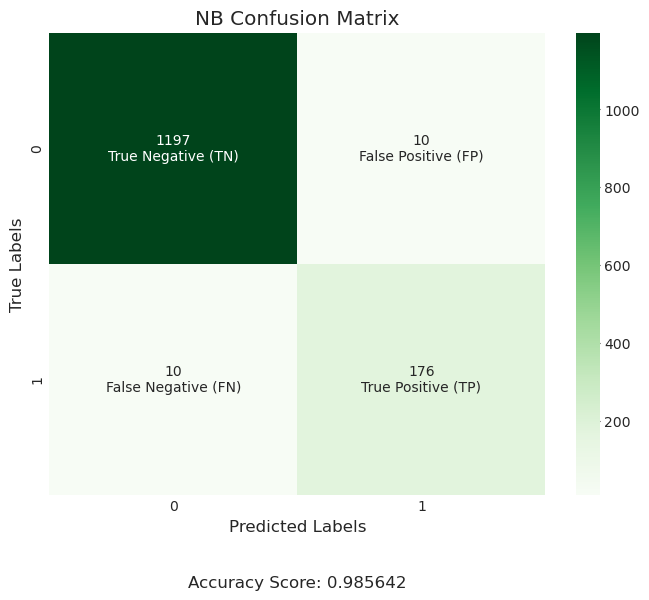

Compare First 15 Values
Predictions:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
True Data:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define heatmap values
nb_cm_vals = [[f'{nb_cm[0][0]}\nTrue Negative (TN)', f'{nb_cm[0][1]}\nFalse Positive (FP)'],
          [f'{nb_cm[1][0]}\nFalse Negative (FN)', f'{nb_cm[1][1]}\nTrue Positive (TP)']]

# Define Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(nb_cm, annot=nb_cm_vals, fmt='', cmap='Greens')

# Set Labels
ax.set_title('NB Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Add Accuracy
plt.text(0.5, -0.2, f'Accuracy Score: {nb_acc:.6f}', fontsize=12, ha='center', transform=ax.transAxes)


# Display plot
plt.show()

# Compare Prediction vs True Value
print('Compare First 15 Values\n'
      f'Predictions:\t{y_pred_NB[0:15]}\n'
      f'True Data:\t{y_test.to_numpy()[0:15]}')

### Metrics Analysis

#### <u> Confusion Matrix </u>

|                 | Predicted Value<br>[0] | Predicted Value<br>[1] |
| --------------- | ---------------------- | ---------------------- |
| True Value [0]  | <sub>*Prediction Correct*</sub><br> True Negative (TN)     | <sub>*Prediction Incorrect*</sub><br> False Positive (FP)   |
| True Value [1]  | <sub>*Prediction Incorrect*</sub><br> False Negative (FN)    | <sub>*Prediction Correct*</sub><br> True Positive (TP)      |

| P, T | 0           | 1           |
| ---- | ----------- | ----------- |
| 0    | <b>0, 0</b> | 1, 0        |
| 1    | 0, 1        | <b>1, 1</b> |

Therefore, the stats above state the following

| | |
| ---------------------------------------------------- | -------------------------------------------------- |
| 1197 Predicted HAM Correctly                         | 10 Predicted SPAM incorrectly,<br> was actually HAM |
| 10 Predicted HAM incorrectly,<br> was actually SPAM  | 176 Predicted SPAM Correctly                       |

#### <u> Model Analysis </u>

As we can see, the Naive Bayes method is quite successful at correctly identifying Spam and Ham, achieving an accuracy score of 98.56%. This is shown first by displaying the first 15 values - the fifteenth message (at array location 14) is correctly identified as spam. Furthermore, the Confusion Matrix above correctly identifies 176 instances of Spam and 1197 instances of Ham. Since the model is not perfect, there were also 10 instances of Ham incorrectly identified as Spam, and of Spam incorrectly identified as Ham. A snippet of each of these are shown below.

## Preview Predictions

In [45]:
import pandas as pd

# Save prediction types
tp = (y_pred_NB==1) & (y_test==1)
fp = y_pred_NB > y_test
tn = (y_pred_NB==0) & (y_test==0)
fn = y_pred_NB < y_test

# Convert tokenized messages to strings
messages = [
    [' '.join(tokens) for tokens in X_test[tp].values[0:20]],
    [' '.join(tokens) for tokens in X_test[fp].values[0:20]],
    [' '.join(tokens) for tokens in X_test[tn].values[0:20]],
    [' '.join(tokens) for tokens in X_test[fn].values[0:20]]
]

# Calculate length of shortest row
min_len = min(len(row) for row in messages)

# Truncate all rows to shortest row size
messages = [row[:min_len] for row in messages]

# Create DataFrame to hold the data
data = {
    'True Positives': messages[0],
    'False Positives': messages[1],
    'True Negatives': messages[2],
    'False Negatives': messages[3]
}
df = pd.DataFrame(data)

# Print the DataFrame
df

,True Positives,False Positives,True Negatives,False Negatives
0,FREE RINGTONE text FIRST 87131 poly text GET 8...,Customer place call,Squeeeeeze christmas hug u lik frndshp den hug...,Oh god found number glad text back xafter msg ...
1,2nd time tried 2 contact u U £750 Pound prize ...,number u live 11,also sorta blown couple time recently id rathe...,next amazing xxx PICSFREE1 video sent enjoy on...
2,Reminder downloaded content already paid Goto ...,K eng rocking ash,Mmm thats better got roast id b better drink ...,Babe U want dont u baby Im nasty thing 4 filth...
3,Guess Somebody know secretly fancy Wan na find...,currently scotland,Mm kanji dont eat anything heavy ok,Hello darling today would love chat dont tell ...
4,8007 FREE 1st week No1 Nokia tone 4 ur mob eve...,K deleted contact,ring come guy costume gift future yowifes Hint...,realize 40 year thousand old lady running arou...
5,URGENT Mobile number awarded £2000 prize GUARA...,Customer place call,Sary need Tim bollox hurt lot tol,Talk sexy Make new friend fall love world disc...
6,message free Welcome new improved Sex Dogging ...,u receive msg,Love decision feeling could decide love life w...,Sorry missed call let talk time PhoneNumberID9
7,SMS SERVICES inclusive text credit pls goto ww...,waiting machan Call free,supervisor find 4 one lor thk student havent a...,Email AlertFrom Jeri StewartSize 2KBSubject Lo...
8,Mobile customer may claim FREE CAMERA PHONE up...,sent JD Customer Service cum Accounts Executiv...,Dear good morning,CALL PhoneNumberID0 LISTEN EXTREME DIRTY LIVE ...
9,Todays Voda number ending 5226 selected receiv...,Yavnt tried yet never played original either,chennai velachery,hear new Divorce Barbie come Ken stuff


----

# <center>  Decision Tree </center>

## Create Decision Tree 
### Fit Decision Tree with Gini impurity

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42) #Create Instance
model_dt = dt.fit(X_train_np, y_train)

### Visualize Decision Tree

In [47]:
# #                                                          #
# #                            Note                          #
# #                                                          #
# #    Tree Visualizations are commented out by default as   #
# #           they are computationally expensive.            #
# #                                                          #
# #                                                          #
# #            To view the tree, uncomment cell.             #
# #                                                          #
# #   [Tip: ctrl+a then ctrl+/ will quickly uncomment cell]  #
# #                                                          #

# from sklearn import tree
# import matplotlib.pyplot as plt


# plt.figure(figsize=(30,100))       #resize figure
# tree.plot_tree(model_dt, 
#                fontsize=15, 
#                feature_names=vect.get_feature_names_out()) #plot

# plt.show()                        #display tree

### Test Model Metrics: DT

In [48]:
# Make Predictions
y_pred_dt = model_dt.predict(X_test_np)     #determine prediction value

# Calculate Metrics
dt_cm = confusion_matrix(y_test, y_pred_dt) #cm(true data, predictions)
dt_acc = accuracy_score(y_test, y_pred_dt)  #acc(true data, predictions)

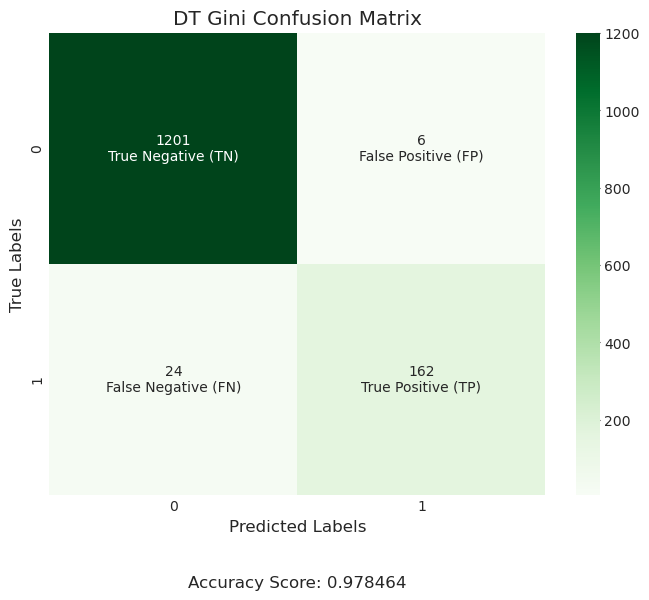

Compare First 15 Values
Predictions:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
True Data:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [49]:
# Define heatmap values
dt_cm_vals = [[f'{dt_cm[0][0]}\nTrue Negative (TN)', f'{dt_cm[0][1]}\nFalse Positive (FP)'],
          [f'{dt_cm[1][0]}\nFalse Negative (FN)', f'{dt_cm[1][1]}\nTrue Positive (TP)']]

# Define Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dt_cm, annot=dt_cm_vals, fmt='', cmap='Greens')

# Set Labels
ax.set_title('DT Gini Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Add Accuracy
plt.text(0.5, -0.2, f'Accuracy Score: {dt_acc:.6f}', fontsize=12, ha='center', transform=ax.transAxes)


# Display plot
plt.show()

# Compare Prediction vs True Value
print('Compare First 15 Values\n'
      f'Predictions:\t{y_pred_dt[0:15]}\n'
      f'True Data:\t{y_test.to_numpy()[0:15]}')

### Analyze Model Metrics

#### <u> Confusion Matrix </u>

|                 | Predicted Value<br>[0] | Predicted Value<br>[1] |
| --------------- | ---------------------- | ---------------------- |
| True Value [0]  | Prediction Correct     | Prediction Incorrect   |
| True Value [1]  | Prediction Incorrect   | Prediction Correct     |

| P, T | 0           | 1           |
| ---- | ----------- | ----------- |
| 0    | <b>0, 0</b> | 1, 0        |
| 1    | 0, 1        | <b>1, 1</b> |

Therefore, the stats above state the following

| | |
| ---------------------------------------------------- | -------------------------------------------------- |
| 1201 Predicted HAM Correctly                         | 6 Predicted SPAM incorrectly,<br> was actually HAM |
| 24 Predicted HAM incorrectly,<br> was actually SPAM  | 162 Predicted SPAM Correctly                       |

#### <u> Classifier Analysis </u>

As we can see, the Decision Tree Bayes method is moderately successful at correctly identifying Spam and Ham, achieving an accuracy score of 97.84%. While this accuracy score is lower than Naive Bayes (98.56%), it is still within an acceptable range.  Similar to the NB prediction, the fifteenth message (at array location 14) is also correctly identified as Spam. Furthermore, the Confusion Matrix above shows that the decision tree correctly identifies 162 instances of Spam and 1201 instances of Ham. However, in an effort to improve accuracy, we will attempt to recreate the model while accounting for entropy, or disorder, in the dataset.

## Recreate Decision Tree: Analyze with Entropy
### Refit Decision Tree

In [50]:
dt_etrpy = DecisionTreeClassifier(random_state = 42, criterion = 'entropy') #Create Instance
model_dt_etrpy = dt_etrpy.fit(X_train_np, y_train)

### Revisualize Decision Tree

In [51]:
# #                                                          #
# #                            Note                          #
# #                                                          #
# #    Tree Visualizations are commented out by default as   #
# #           they are computationally expensive.            #
# #                                                          #
# #                                                          #
# #            To view the tree, uncomment cell.             #
# #                                                          #
# #   [Tip: ctrl+a then ctrl+/ will quickly uncomment cell]  #
# #                                                          #

# from sklearn import tree
# import matplotlib.pyplot as plt


# plt.figure(figsize=(30,100))       #resize figure
# tree.plot_tree(model_dt_etrpy, 
#                fontsize=15, 
#                feature_names=vect.get_feature_names_out()) #plot

# plt.show()                        #display tree

### Retest Model Metrics: DT with Entropy

In [52]:
# Make Predictions
y_pred_dt_etrpy = model_dt_etrpy.predict(X_test_np)     #determine prediction value

# Calculate Metrics
dt_etrpy_cm = confusion_matrix(y_test, y_pred_dt_etrpy) #cm(true data, predictions)
dt_etrpy_acc = accuracy_score(y_test, y_pred_dt_etrpy)  #acc(true data, predictions)

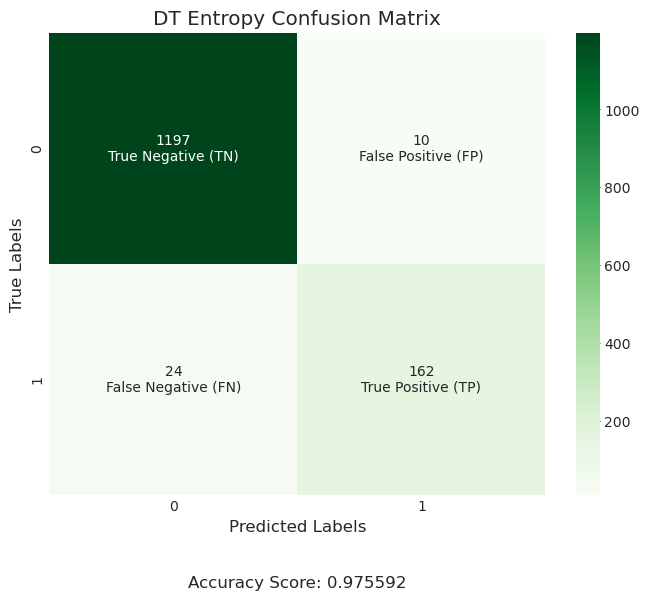

Compare First 15 Values
Predictions:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
True Data:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [53]:
# Define heatmap values
dt_etrpy_cm_vals = [[f'{dt_etrpy_cm[0][0]}\nTrue Negative (TN)', f'{dt_etrpy_cm[0][1]}\nFalse Positive (FP)'],
          [f'{dt_etrpy_cm[1][0]}\nFalse Negative (FN)', f'{dt_etrpy_cm[1][1]}\nTrue Positive (TP)']]

# Define Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dt_etrpy_cm, annot=dt_etrpy_cm_vals, fmt='', cmap='Greens')

# Set Labels
ax.set_title('DT Entropy Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Add Accuracy
plt.text(0.5, -0.2, f'Accuracy Score: {dt_etrpy_acc:.6f}', fontsize=12, ha='center', transform=ax.transAxes)


# Display plot
plt.show()

# Compare Prediction vs True Value
print('Compare First 15 Values\n'
      f'Predictions:\t{y_pred_dt_etrpy[0:15]}\n'
      f'True Data:\t{y_test.to_numpy()[0:15]}')

### Analyze Model Metrics

#### <u> Confusion Matrix </u>

|                 | Predicted Value<br>[0] | Predicted Value<br>[1] |
| --------------- | ---------------------- | ---------------------- |
| True Value [0]  | Prediction Correct     | Prediction Incorrect   |
| True Value [1]  | Prediction Incorrect   | Prediction Correct     |

| P, T | 0           | 1           |
| ---- | ----------- | ----------- |
| 0    | <b>0, 0</b> | 1, 0        |
| 1    | 0, 1        | <b>1, 1</b> |

Therefore, the stats above state the following

| | |
| ---------------------------------------------------- | --------------------------------------------------- |
| 1197 Predicted HAM Correctly                         | 18 Predicted SPAM incorrectly,<br> was actually HAM |
| 24 Predicted HAM incorrectly,<br> was actually SPAM  | 162 Predicted SPAM Correctly                        |

#### <u> Classifier Analysis </u>

As the metrics show, the entropy refitting of the Decision Tree Bayes method was unable to improve the overall accuracy of our standard DT model. While this model performed equally at identifying spam messages (162 correct), it was much less accurate at identifying ham messages (1197 correct vs 1201 correct). As such, the accuracy score for this model decreased to 97.55%. We will attempt to recreate the model again to see if we can increase without a loss in correct ham detection. Next, we will implement pre-pruning to limit excess tree growth and prevent overfitting.

## Recreate Decision Tree: Pre-Pruning

### Refit Decision Tree
#### Find Optimal Max_Depth

In [54]:
optm_found = False #flag for finding optimal depth

In [55]:
#Find current max_depth of Model
curr_depth = model_dt.tree_.max_depth
print(curr_depth)

50


In [56]:
# #                                                          #
# #                            Note                          #
# #                                                          #
# #      This cell is commented out by default as it is      #
# #                computationally expensive.                #
# #                                                          #
# #   However, the code is left in to show the process of    # 
# #     determining the max_depth used in the next cell.     # 
# #                                                          #
# #        To implement this method, uncomment cell.         #
# #                                                          #
# #   [Tip: ctrl+a then ctrl+/ will quickly uncomment cell]  #
# #                                                          #


# # Find Optimal max_depth for Model
# optimal = []                              # list to hold optimal depth [depth, accuracy]

# for each_depth in range(1,curr_depth):    #iterate over depths


#     dt_optm = DecisionTreeClassifier(random_state = 42,
#                                      criterion = 'entropy',
#                                      max_depth=each_depth)   #create instance for each_depth
#     model_optm = dt_optm.fit(X_train_np, y_train)            #fit model to new instance


#     pred_optm = model_optm.predict(X_test_np)                #make prediction
#     acc_optm = accuracy_score(y_test, pred_optm)             #test accuracy


#     #                                                          #
#     #                    Additional Option                     #
#     #                                                          #
#     #       The print statement below will print out all       #
#     #   metrics (depth, accuracy, and confustion matrix) for   #
#     #               all depths 1 to curr_depth.                #
#     #                                                          #
#     #    This statement is further commented out by default    #
#     #        as it prints excessive data to the console        #
#     #                                                          #
#     #       To implement, uncomment the statement below:       #
#     #                                                          #

#     # print(f'<{each_depth}>\t{acc_optm}\n{confusion_matrix(y_test, pred_optm)}\n')    #cm(true data, predictions)  


#     if each_depth == 1 or acc_optm > optimal[1]:
#         optimal = [each_depth, acc_optm]
#         optm_found = True

# print(f'The max depth of {optimal[0]} provides the greatest accuracy score of {optimal[1]}')

In [57]:
#Test if Previous Cell Ran
optm_depth = optimal[0] if optm_found else 19

#### Fit Model to Optimal Max_Depth

In [58]:
print(f'Fitting Decision Tree to max_depth of {optm_depth} ...')
dt_preprn = DecisionTreeClassifier(random_state = 42, criterion = 'entropy',max_depth=optm_depth) #Create Instance
model_dt_preprn = dt_preprn.fit(X_train_np, y_train)

Fitting Decision Tree to max_depth of 19 ...


### Revisualize Decision Tree

In [59]:
# #                                                          #
# #                            Note                          #
# #                                                          #
# #    Tree Visualizations are commented out by default as   #
# #           they are computationally expensive.            #
# #                                                          #
# #                                                          #
# #            To view the tree, uncomment cell.             #
# #                                                          #
# #   [Tip: ctrl+a then ctrl+/ will quickly uncomment cell]  #
# #                                                          #

# from sklearn import tree
# import matplotlib.pyplot as plt


# plt.figure(figsize=(30,100))       #resize figure
# tree.plot_tree(model_dt_preprn, 
#                fontsize=15, 
#                feature_names=vect.get_feature_names_out()) #plot

# plt.show()                        #display tree

### Retest Model Metrics: DT with Pre-Pruning

In [60]:
# Make Predictions
y_pred_dt_preprn = model_dt_preprn.predict(X_test_np)     #determine prediction value

# Calculate Metrics
dt_preprn_cm = confusion_matrix(y_test, y_pred_dt_preprn) #cm(true data, predictions)
dt_preprn_acc = accuracy_score(y_test, y_pred_dt_preprn)  #acc(true data, predictions)

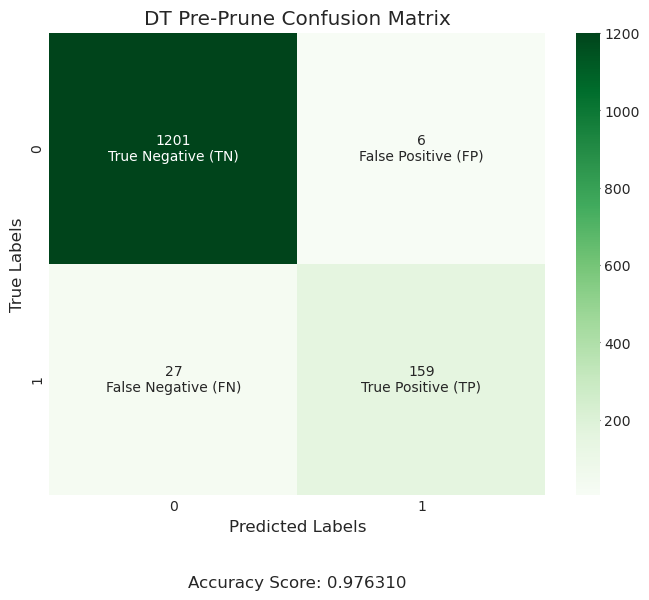

Compare First 15 Values
Predictions:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
True Data:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [61]:
# Define heatmap values
dt_preprn_cm_vals = [[f'{dt_preprn_cm[0][0]}\nTrue Negative (TN)', f'{dt_preprn_cm[0][1]}\nFalse Positive (FP)'],
          [f'{dt_preprn_cm[1][0]}\nFalse Negative (FN)', f'{dt_preprn_cm[1][1]}\nTrue Positive (TP)']]

# Define Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dt_preprn_cm, annot=dt_preprn_cm_vals, fmt='', cmap='Greens')

# Set Labels
ax.set_title('DT Pre-Prune Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Add Accuracy
plt.text(0.5, -0.2, f'Accuracy Score: {dt_preprn_acc:.6f}', fontsize=12, ha='center', transform=ax.transAxes)


# Display plot
plt.show()

# Compare Prediction vs True Value
print('Compare First 15 Values\n'
      f'Predictions:\t{y_pred_dt_preprn[0:15]}\n'
      f'True Data:\t{y_test.to_numpy()[0:15]}')

### Analyze Model Metrics

#### <u> Confusion Matrix </u>

|                 | Predicted Value<br>[0] | Predicted Value<br>[1] |
| --------------- | ---------------------- | ---------------------- |
| True Value [0]  | Prediction Correct     | Prediction Incorrect   |
| True Value [1]  | Prediction Incorrect   | Prediction Correct     |

| P, T | 0           | 1           |
| ---- | ----------- | ----------- |
| 0    | <b>0, 0</b> | 1, 0        |
| 1    | 0, 1        | <b>1, 1</b> |

Therefore, the stats above state the following

| | |
| ---------------------------------------------------- | --------------------------------------------------- |
| 1201 Predicted HAM Correctly                         | 6 Predicted SPAM incorrectly,<br> was actually HAM  |
| 27 Predicted HAM incorrectly,<br> was actually SPAM  | 159 Predicted SPAM Correctly                        |

#### <u> Classifier Analysis </u>

Pre-pruning the Decision Tree classifier was still unable to improve overall accuracy and scored 97.63%. By limiting the tree from over-fitting, this model became more successful than our Entropy model, and the same as our original model at identifying Ham messages (1201 correct vs 1201 correct in original model vs 1197 in entropy model). However, this model was less successful than both of the other models at identifying spam messages (159 correct vs 162 correct in original model and entropy models). Since the model increased from our entropy model in correct ham identification, but decreased in correct spam identification, the accuracy score was between our Entropy and Gini models at 97.63%. As the aim was to increase our overall accuracy and without sacrificing TP, we attempted a random forest next

Although this refitting did improve accuracy, we will attempt to recreate the model again to see if we can increase without a loss in correct spam detection. Next, we will attempt the Random Forest variation. Similar to pre-pruning, Random Forests also prevent overfitting.

## Recreate Decision Tree: Random Forest
### Refit Decision Tree

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
model_dt_rf = rf.fit(X_train_np, y_train)

In [63]:
#View Number of Trees
rf.n_estimators

100

### Visualize Random Forest
#### Visualize Tree 1

In [64]:
# # #                                                          #
# # #                            Note                          #
# # #                                                          #
# # #    Tree Visualizations are commented out by default as   #
# # #           they are computationally expensive.            #
# # #                                                          #
# # #    Also, due to the number of features in the dataset,   # 
# # #   the trees may be difficult to read in their entirety.  # 
# # #        They are here for reference purposes only.        #
# # #                                                          #
# # #            To view the tree, uncomment cell.             #
# # #                                                          #
# # #   [Tip: ctrl+a then ctrl+/ will quickly uncomment cell]  #
# # #                                                          #

# from sklearn import tree
# import matplotlib.pyplot as plt

# plt.figure(figsize=(50,100))                                #resize figure
# tree.plot_tree(model_dt_rf.estimators_[0],
#                fontsize=15,
#                feature_names=vect.get_feature_names_out())  #plot tree 1
# plt.show()     #display tree

#### Visualize Tree 100

In [65]:
# # #                                                          #
# # #                            Note                          #
# # #                                                          #
# # #    Tree Visualizations are commented out by default as   #
# # #           they are computationally expensive.            #
# # #                                                          #
# # #    Also, due to the number of features in the dataset,   # 
# # #   the trees may be difficult to read in their entirety.  # 
# # #        They are here for reference purposes only.        #
# # #                                                          #
# # #            To view the tree, uncomment cell.             #
# # #                                                          #
# # #   [Tip: ctrl+a then ctrl+/ will quickly uncomment cell]  #
# # #                                                          #

# from sklearn import tree
# import matplotlib.pyplot as plt

# plt.figure(figsize=(50,100))                                #resize figure
# tree.plot_tree(model_dt_rf.estimators_[99],
#                fontsize=15,
#                feature_names=vect.get_feature_names_out())  #plot tree 1
# plt.show()     #display tree

### Retest Model Metrics: Random Forest

In [66]:
# Make Predictions
y_pred_dt_rf = model_dt_rf.predict(X_test_np)     #determine prediction value

# Calculate Metrics
dt_rf_cm = confusion_matrix(y_test, y_pred_dt_rf) #cm(true data, predictions)
dt_rf_acc = accuracy_score(y_test, y_pred_dt_rf)  #acc(true data, predictions)

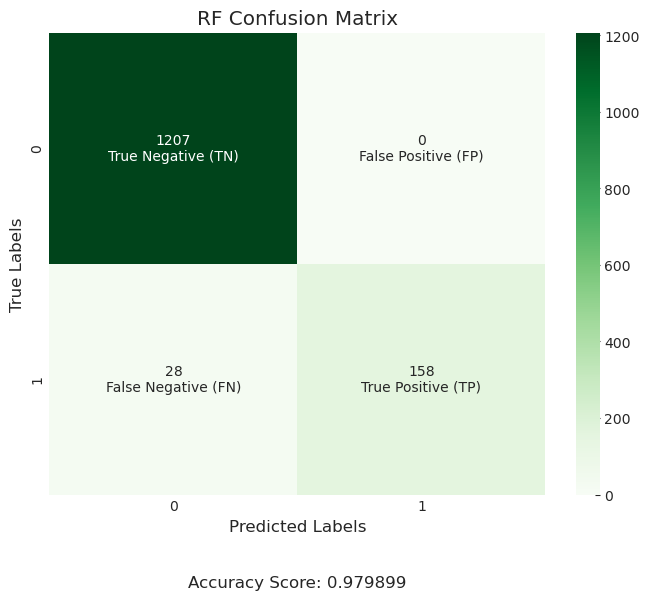

Compare First 15 Values
Predictions:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
True Data:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [67]:
# Define heatmap values
dt_rf_cm_vals = [[f'{dt_rf_cm[0][0]}\nTrue Negative (TN)', f'{dt_rf_cm[0][1]}\nFalse Positive (FP)'],
          [f'{dt_rf_cm[1][0]}\nFalse Negative (FN)', f'{dt_rf_cm[1][1]}\nTrue Positive (TP)']]

# Define Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dt_rf_cm, annot=dt_rf_cm_vals, fmt='', cmap='Greens')

# Set Labels
ax.set_title('RF Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Add Accuracy
plt.text(0.5, -0.2, f'Accuracy Score: {dt_rf_acc:.6f}', fontsize=12, ha='center', transform=ax.transAxes)


# Display plot
plt.show()

# Compare Prediction vs True Value
print('Compare First 15 Values\n'
      f'Predictions:\t{y_pred_dt_rf[0:15]}\n'
      f'True Data:\t{y_test.to_numpy()[0:15]}')

### Analyze Model Metrics

#### <u> Confusion Matrix </u>

|                 | Predicted Value<br>[0] | Predicted Value<br>[1] |
| --------------- | ---------------------- | ---------------------- |
| True Value [0]  | Prediction Correct     | Prediction Incorrect   |
| True Value [1]  | Prediction Incorrect   | Prediction Correct     |

| P, T | 0           | 1           |
| ---- | ----------- | ----------- |
| 0    | <b>0, 0</b> | 1, 0        |
| 1    | 0, 1        | <b>1, 1</b> |

Therefore, the stats above state the following

| | |
| ---------------------------------------------------- | --------------------------------------------------- |
| 1207 Predicted HAM Correctly                         | 0 Predicted SPAM incorrectly,<br> was actually HAM |
| 28 Predicted HAM incorrectly,<br> was actually SPAM  | 158 Predicted SPAM Correctly                        |

#### <u> Classifier Analysis </u>

Random Forests did improve overall accuracy to 97.91%. By using multiple decision trees to make predictions, this model became more successful than all of our other decision tree models at identifying Ham messages (1207 correct vs 1202 correct in pre-pruned model vs 1194 correct in original model vs 1199 in entropy model). While the TP score predicted was less than the other models, the TN increased significantly more than the TP decreased; thus, random forests provide the highest accuracy score - increasing from our original 97.84% to 97.98%. A summation of these values are shown below.

## Compare DT Model Metrics
### View Comparison Table 

In [68]:
from prettytable import PrettyTable    

tbl_dt = PrettyTable()
tbl_dt.field_names = ["Model Name", "Accuracy Score", "TP", "TN", "FP", "FN"]
tbl_dt.add_row(["Normal Model", "{:.6f}".format(dt_acc), dt_cm[1,1], dt_cm[0,0], dt_cm[0,1], dt_cm[1,0]])
tbl_dt.add_row(["Entropy Model", "{:.6f}".format(dt_etrpy_acc), dt_etrpy_cm[1,1], dt_etrpy_cm[0,0], dt_etrpy_cm[0,1], dt_etrpy_cm[1,0]])
tbl_dt.add_row(["Pre-Pruned Model", "{:.6f}".format(dt_preprn_acc), dt_preprn_cm[1,1], dt_preprn_cm[0,0], dt_preprn_cm[0,1], dt_preprn_cm[1,0]])
tbl_dt.add_row(["Random Forest", "{:.6f}".format(dt_rf_acc), dt_rf_cm[1,1], dt_rf_cm[0,0], dt_rf_cm[0,1], dt_rf_cm[1,0]])

print(tbl_dt)

+------------------+----------------+-----+------+----+----+
|    Model Name    | Accuracy Score |  TP |  TN  | FP | FN |
+------------------+----------------+-----+------+----+----+
|   Normal Model   |    0.978464    | 162 | 1201 | 6  | 24 |
|  Entropy Model   |    0.975592    | 162 | 1197 | 10 | 24 |
| Pre-Pruned Model |    0.976310    | 159 | 1201 | 6  | 27 |
|  Random Forest   |    0.979899    | 158 | 1207 | 0  | 28 |
+------------------+----------------+-----+------+----+----+


### View Confusion Matrix Heatmaps

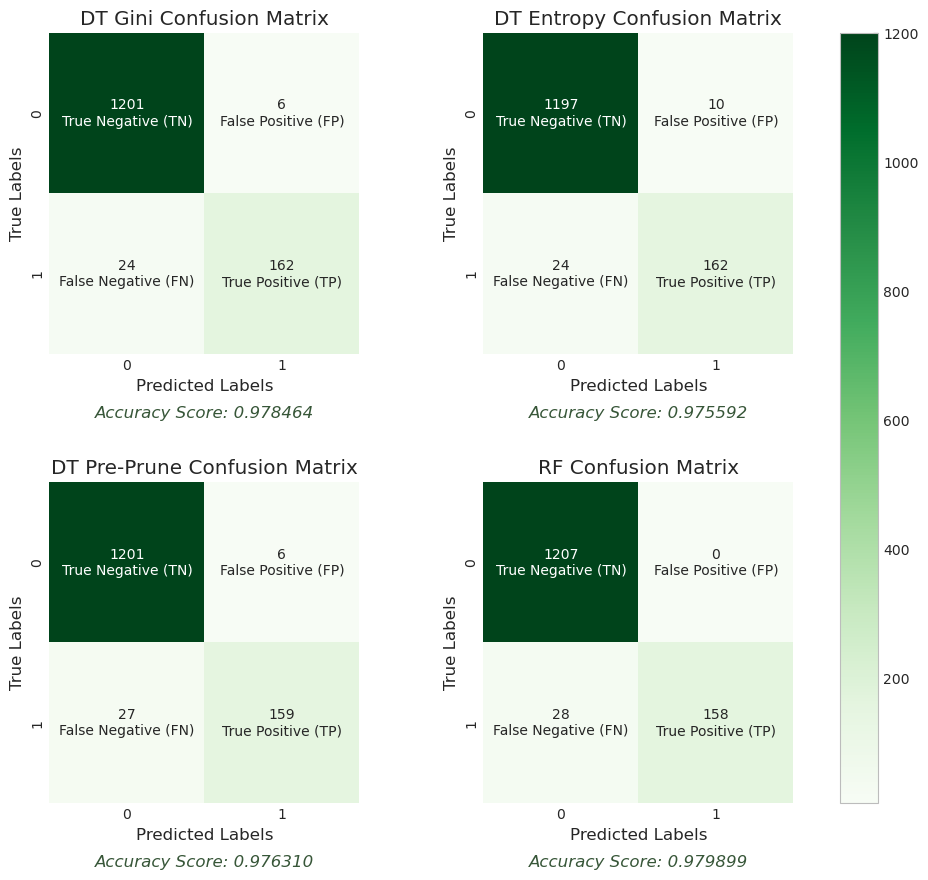

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot Models
#DT Gini
sns.heatmap(dt_cm, annot=dt_cm_vals, fmt='', cmap='Greens', 
            ax=axs[0, 0], cbar=False)
axs[0, 0].set_title('DT Gini Confusion Matrix')
axs[0, 0].set_xlabel('Predicted Labels')
axs[0, 0].set_ylabel('True Labels')
axs[0, 0].text(0.5, -0.2, f'Accuracy Score: {dt_acc:.6f}', 
               fontsize=12, ha='center', transform=axs[0, 0].transAxes,
               color='#375638', fontstyle='italic')

#DT Entropy
sns.heatmap(dt_etrpy_cm, annot=dt_etrpy_cm_vals, fmt='', 
            cmap='Greens', ax=axs[0, 1], cbar=False)
axs[0, 1].set_title('DT Entropy Confusion Matrix')
axs[0, 1].set_xlabel('Predicted Labels')
axs[0, 1].set_ylabel('True Labels')
axs[0, 1].text(0.5, -0.2, f'Accuracy Score: {dt_etrpy_acc:.6f}', 
               fontsize=12, ha='center', transform=axs[0, 1].transAxes, 
               color='#375638', fontstyle='italic')

#DT Pre-Prune
sns.heatmap(dt_preprn_cm, annot=dt_preprn_cm_vals, fmt='', 
            cmap='Greens', ax=axs[1, 0], cbar=False)
axs[1, 0].set_title('DT Pre-Prune Confusion Matrix')
axs[1, 0].set_xlabel('Predicted Labels')
axs[1, 0].set_ylabel('True Labels')
axs[1, 0].text(0.5, -0.2, f'Accuracy Score: {dt_preprn_acc:.6f}', 
               fontsize=12, ha='center', transform=axs[1, 0].transAxes, 
               color='#375638', fontstyle='italic')

#RF
sns.heatmap(dt_rf_cm, annot=dt_rf_cm_vals, fmt='', cmap='Greens', 
            ax=axs[1, 1], cbar=False)
axs[1, 1].set_title('RF Confusion Matrix')
axs[1, 1].set_xlabel('Predicted Labels')
axs[1, 1].set_ylabel('True Labels')
axs[1, 1].text(0.5, -0.2, f'Accuracy Score: {dt_rf_acc:.6f}', 
               fontsize=12, ha='center', transform=axs[1, 1].transAxes, 
               color='#375638', fontstyle='italic')

# Modify Plot Visuals
plt.subplots_adjust(wspace=0.4, hspace=0.4)     #adjust padding 
fig.colorbar(axs[1, 0].collections[0], ax=axs, location='right')    #create cbar

# Display plot
plt.show()

---

# <center>  K-Nearest Neighbors </center>

## Fit KNN Model

### K - Nearest Neighbors 1

#### Calculate K Method: Square Root

$$k = \sqrt{No. of Training Examples}$$

In [70]:
training_size = len(X_train_np)
k = int(math.sqrt(training_size))         # n_neighbors = k = number of nearest neighbors to obtain categorical data from
k

64

#### Create and Fit Classifier: KNN - Square Root Method

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn_sqrt = KNeighborsClassifier(n_neighbors = k).fit(X_train_np, y_train)

#### Test Model Metrics: KNN - Square Root Method

In [72]:
# Make Predictions
pred_knn_sqrt = knn_sqrt.predict(X_test_np)           #determine prediction value

# Calculate Metrics
knn_sqrt_cm = confusion_matrix(y_test, pred_knn_sqrt) #cm(true data, predictions)
knn_sqrt_acc = accuracy_score(y_test, pred_knn_sqrt)  #acc(true data, predictions)

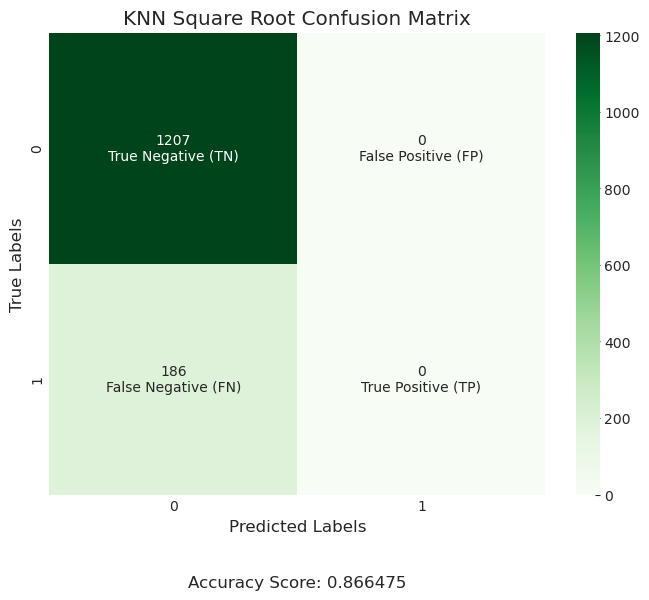

Compare First 15 Values
Predictions:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True Data:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [73]:
# Define heatmap values
knn_sqrt_cm_vals = [[f'{knn_sqrt_cm[0][0]}\nTrue Negative (TN)', f'{knn_sqrt_cm[0][1]}\nFalse Positive (FP)'],
          [f'{knn_sqrt_cm[1][0]}\nFalse Negative (FN)', f'{knn_sqrt_cm[1][1]}\nTrue Positive (TP)']]

# Define Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(knn_sqrt_cm, annot=knn_sqrt_cm_vals, fmt='', cmap='Greens')

# Set Labels
ax.set_title('KNN Square Root Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Add Accuracy
plt.text(0.5, -0.2, f'Accuracy Score: {knn_sqrt_acc:.6f}', fontsize=12, ha='center', transform=ax.transAxes)


# Display plot
plt.show()

# Compare Prediction vs True Value
print('Compare First 15 Values\n'
      f'Predictions:\t{pred_knn_sqrt[0:15]}\n'
      f'True Data:\t{y_test.to_numpy()[0:15]}')

### Metrics Analysis

#### Confusion Matrix

|                 | Predicted Value<br>[0] | Predicted Value<br>[1] |
| --------------- | ---------------------- | ---------------------- |
| True Value [0]  | Prediction Correct     | Prediction Incorrect   |
| True Value [1]  | Prediction Incorrect   | Prediction Correct     |

| P, T | 0           | 1           |
| ---- | ----------- | ----------- |
| 0    | <b>0, 0</b> | 1, 0        |
| 1    | 0, 1        | <b>1, 1</b> |

Therefore, the stats above state the following

| | |
| ---------------------------------------------------- | -------------------------------------------------- |
| 1207 Predicted HAM Correctly                         | 0 Predicted SPAM incorrectly,<br> was actually HAM |
| 186 Predicted HAM incorrectly,<br> was actually SPAM  | 0 Predicted SPAM Correctly                       |


#### Classifier Analysis
As we can see, this method failed to identify any instances of spam and only contains an accuracy score of 86.64%. 

If we remember from our dataset, an over-overwhelming number of the dataset is ham, and contains the value '0'. In the KNN square root method, this can cause bias. As a result, all of our predictions are [ham, 0], and renders this method useless.

To counter this bias, we will implement the Grid Search optimazation method to calculate k instead. 

### K - Nearest Neighbors 2

#### Calculate K Method: Grid Search

In [74]:
from sklearn.model_selection import GridSearchCV

'''
######################## IMPORTANT ######################### 
#          This Cell is computationally expensive.         #
#            Long wait times may be experienced.           #
############################################################ 
'''

#                                                          #
#                            Note                          #
#                                                          #
#      An even more accurate calculation method for k      #
#    is listed below. However, this method is commented    #
#      out due to exceedingly long computation times.      #                      
#                                                          #
#  To implement this method, follow the guidelines below:  #
#                                                          #

#### uncomment the section below:
#
# training_size = len(X_train_np)
# range_max = int(training_size/2)
#
#### end of section

#### comment the section below:

range_max = 15

#### end of section


'''############# DO NOT EDIT BELOW THIS LINE ############'''
print(f'Calculating with max range of {range_max}')

knn_grid = KNeighborsClassifier()
search_space = [{'n_neighbors':list(range(1,range_max))}]   #specify range of grid search space
grid_search_vals = GridSearchCV(knn_grid, search_space).fit(X_train_np, y_train)

Calculating with max range of 15


In [75]:
# view all grid search values
grid_search_vals

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14]}])

In [76]:
# view grid best estimator
k = grid_search_vals.best_estimator_.get_params()['n_neighbors'] # set k to grid best estimator
k 

1

#### Fit Classifier: KNN - Grid Search Method

In [77]:
knn_grid = KNeighborsClassifier(n_neighbors = k).fit(X_train_np, y_train)

#### Test Model Metrics: KNN - Grid Search Method

In [78]:
# Make Predictions
pred_knn_grid = knn_grid.predict(X_test_np)           #determine prediction value

# Calculate Metrics
knn_grid_cm = confusion_matrix(y_test, pred_knn_grid) #cm(true data, predictions)
knn_grid_acc = accuracy_score(y_test, pred_knn_grid)  #acc(true data, predictions)

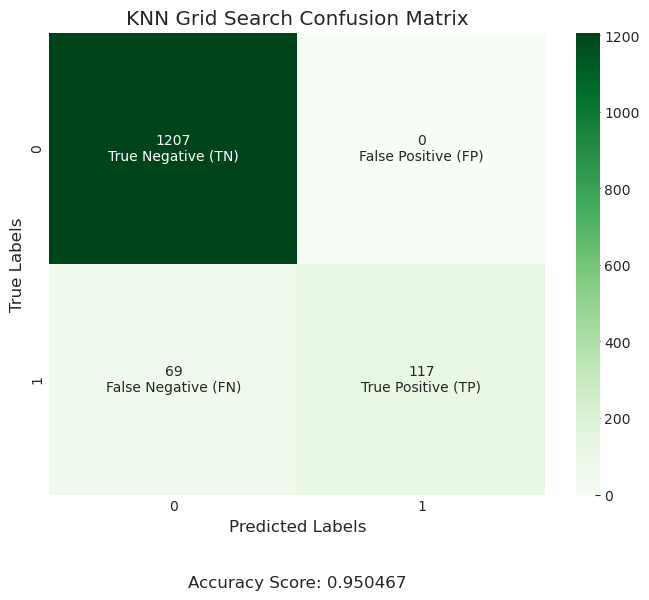

Compare First 15 Values
Predictions:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
True Data:	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [79]:
# Define heatmap values
knn_grid_cm_vals = [[f'{knn_grid_cm[0][0]}\nTrue Negative (TN)', f'{knn_grid_cm[0][1]}\nFalse Positive (FP)'],
          [f'{knn_grid_cm[1][0]}\nFalse Negative (FN)', f'{knn_grid_cm[1][1]}\nTrue Positive (TP)']]

# Define Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(knn_grid_cm, annot=knn_grid_cm_vals, fmt='', cmap='Greens')

# Set Labels
ax.set_title('KNN Grid Search Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Add Accuracy
plt.text(0.5, -0.2, f'Accuracy Score: {knn_grid_acc:.6f}', fontsize=12, ha='center', transform=ax.transAxes)


# Display plot
plt.show()

# Compare Prediction vs True Value
print('Compare First 15 Values\n'
      f'Predictions:\t{pred_knn_grid[0:15]}\n'
      f'True Data:\t{y_test.to_numpy()[0:15]}')

#### Metrics Analysis

##### Confusion Matrix

|                 | Predicted Value<br>[0] | Predicted Value<br>[1] |
| --------------- | ---------------------- | ---------------------- |
| True Value [0]  | Prediction Correct     | Prediction Incorrect   |
| True Value [1]  | Prediction Incorrect   | Prediction Correct     |

| P, T | 0           | 1           |
| ---- | ----------- | ----------- |
| 0    | <b>0, 0</b> | 1, 0        |
| 1    | 0, 1        | <b>1, 1</b> |

Therefore, the stats above state the following

| | |
| ---------------------------------------------------- | -------------------------------------------------- |
| 1207 Predicted HAM Correctly                         | 0 Predicted SPAM incorrectly,<br> was actually HAM |
| 69 Predicted HAM incorrectly,<br> was actually SPAM  | 117 Predicted SPAM Correctly                       |


##### Classifier Analysis
As we can see, this method correctly identified 117 instances of spam (versus 0 in the square-root method). This grid search optimization was able to increase the accuracy score by 8.39% to 95.04%. While bias has been successfully lowered, the KNN algorithm remains more limited in its Spam v Ham classification abilities than the NB and DT/RF models.

In [80]:
tbl_knn = PrettyTable()

tbl_knn.field_names = ["Model Name", "Accuracy Score", "TP", "TN", "FP", "FN"]
tbl_knn.add_row(["Square Root Method", "{:.6f}".format(knn_sqrt_acc), knn_sqrt_cm[1,1], knn_sqrt_cm[0,0], knn_sqrt_cm[0,1], knn_sqrt_cm[1,0]])
tbl_knn.add_row(["Grid Search Method", "{:.6f}".format(knn_grid_acc), knn_grid_cm[1,1], knn_grid_cm[0,0], knn_grid_cm[0,1], knn_grid_cm[1,0]])

print(tbl_knn)

+--------------------+----------------+-----+------+----+-----+
|     Model Name     | Accuracy Score |  TP |  TN  | FP |  FN |
+--------------------+----------------+-----+------+----+-----+
| Square Root Method |    0.866475    |  0  | 1207 | 0  | 186 |
| Grid Search Method |    0.950467    | 117 | 1207 | 0  |  69 |
+--------------------+----------------+-----+------+----+-----+


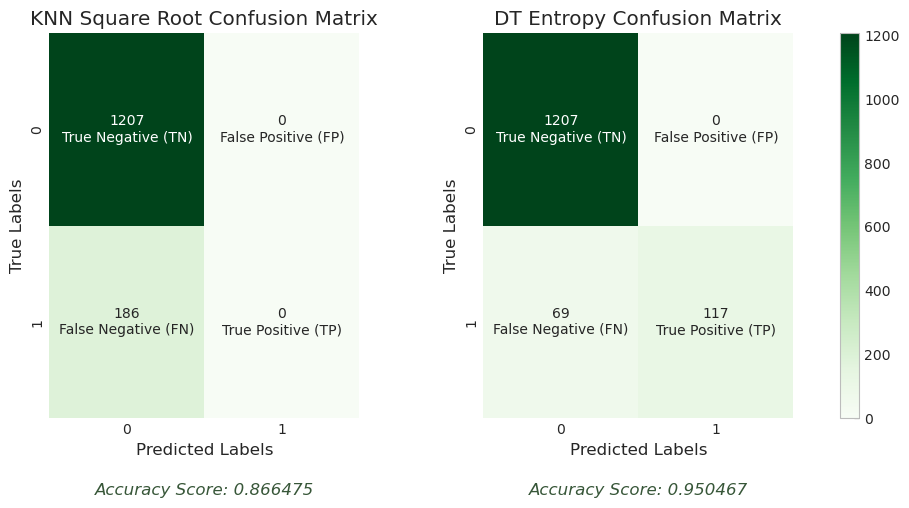

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Models
#KNN Square Root
sns.heatmap(knn_sqrt_cm, annot=knn_sqrt_cm_vals, fmt='', cmap='Greens', 
            ax=axs[0], cbar=False)
axs[0].set_title('KNN Square Root Confusion Matrix')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].text(0.5, -0.2, f'Accuracy Score: {knn_sqrt_acc:.6f}', 
               fontsize=12, ha='center', transform=axs[0].transAxes,
               color='#375638', fontstyle='italic')

#KNN Grid Search
sns.heatmap(knn_grid_cm, annot=knn_grid_cm_vals, fmt='', 
            cmap='Greens', ax=axs[1], cbar=False)
axs[1].set_title('DT Entropy Confusion Matrix')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].text(0.5, -0.2, f'Accuracy Score: {knn_grid_acc:.6f}', 
               fontsize=12, ha='center', transform=axs[1].transAxes, 
               color='#375638', fontstyle='italic')

# Modify Plot Visuals
plt.subplots_adjust(wspace=0.4, hspace=0.4)     #adjust padding 
fig.colorbar(axs[1].collections[0], ax=axs, location='right')    #create cbar

# Display plot
plt.show()

# <center>  Compare Model Metrics </center>

In [82]:
tbl_knn = PrettyTable()

tbl_knn.field_names = ["Model", "Method", "Accuracy Score", "TP", "TN", "FP", "FN"]

tbl_knn.add_row(["NB", "Multinomial", 
                 "{:.6f}".format(nb_acc), 
                 nb_cm[1,1], nb_cm[0,0], 
                 nb_cm[0,1], nb_cm[1,0]])
tbl_knn.add_row(["DT", "Gini (Standard)", 
                 "{:.6f}".format(dt_acc), 
                 dt_cm[1,1], dt_cm[0,0], 
                 dt_cm[0,1], dt_cm[1,0]])
tbl_knn.add_row(["DT", "Entropy", 
                 "{:.6f}".format(dt_etrpy_acc), 
                 dt_etrpy_cm[1,1], dt_etrpy_cm[0,0], 
                 dt_etrpy_cm[0,1], dt_etrpy_cm[1,0]])
tbl_knn.add_row(["DT", "Pre-Pruned", 
                 "{:.6f}".format(dt_preprn_acc),
                 dt_preprn_cm[1,1], dt_preprn_cm[0,0], 
                 dt_preprn_cm[0,1], dt_preprn_cm[1,0]])
tbl_knn.add_row(["DT", "Random Forest",
                 "{:.6f}".format(dt_rf_acc), 
                 dt_rf_cm[1,1], dt_rf_cm[0,0],
                 dt_rf_cm[0,1], dt_rf_cm[1,0]])
tbl_knn.add_row(["KNN", "Square Root", 
                 "{:.6f}".format(knn_sqrt_acc), 
                 knn_sqrt_cm[1,1], knn_sqrt_cm[0,0], 
                 knn_sqrt_cm[0,1], knn_sqrt_cm[1,0]])
tbl_knn.add_row(["KNN", "Grid Search", 
                 "{:.6f}".format(knn_grid_acc), 
                 knn_grid_cm[1,1], knn_grid_cm[0,0], 
                 knn_grid_cm[0,1], knn_grid_cm[1,0]])


print(tbl_knn)

+-------+-----------------+----------------+-----+------+----+-----+
| Model |      Method     | Accuracy Score |  TP |  TN  | FP |  FN |
+-------+-----------------+----------------+-----+------+----+-----+
|   NB  |   Multinomial   |    0.985642    | 176 | 1197 | 10 |  10 |
|   DT  | Gini (Standard) |    0.978464    | 162 | 1201 | 6  |  24 |
|   DT  |     Entropy     |    0.975592    | 162 | 1197 | 10 |  24 |
|   DT  |    Pre-Pruned   |    0.976310    | 159 | 1201 | 6  |  27 |
|   DT  |  Random Forest  |    0.979899    | 158 | 1207 | 0  |  28 |
|  KNN  |   Square Root   |    0.866475    |  0  | 1207 | 0  | 186 |
|  KNN  |   Grid Search   |    0.950467    | 117 | 1207 | 0  |  69 |
+-------+-----------------+----------------+-----+------+----+-----+


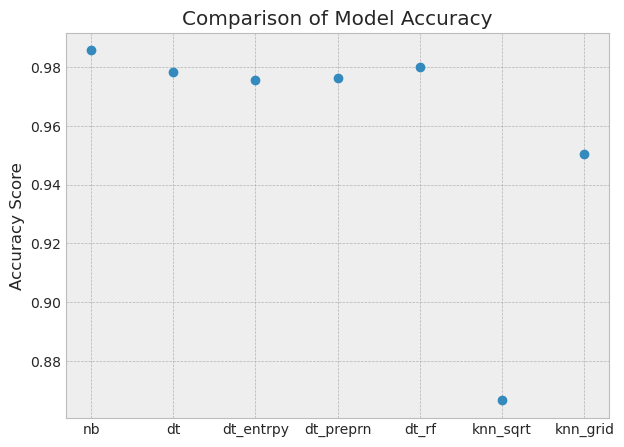

In [83]:
import matplotlib.pyplot as plt

models = ["nb", "dt", "dt_entrpy", "dt_preprn", "dt_rf", "knn_sqrt", "knn_grid"]
accuracy = [nb_acc, dt_acc, dt_etrpy_acc, dt_preprn_acc, dt_rf_acc, knn_sqrt_acc, knn_grid_acc]
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(models, accuracy, 'o')
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracy")
plt.show()


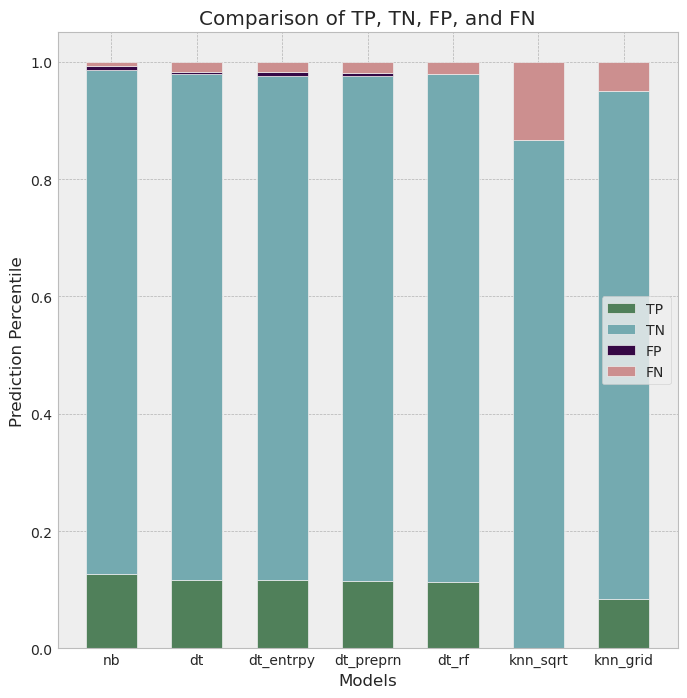

In [84]:
import matplotlib.pyplot as plt

# Create lists for TP, TN, FP, FN values
tp = [nb_cm[1,1], dt_cm[1,1], dt_etrpy_cm[1,1], dt_preprn_cm[1,1], dt_rf_cm[1,1], knn_sqrt_cm[1,1], knn_grid_cm[1,1]]
tn = [nb_cm[0,0], dt_cm[0,0], dt_etrpy_cm[0,0], dt_preprn_cm[0,0], dt_rf_cm[0,0], knn_sqrt_cm[0,0], knn_grid_cm[0,0]]
fp = [nb_cm[0,1], dt_cm[0,1], dt_etrpy_cm[0,1], dt_preprn_cm[0,1], dt_rf_cm[0,1], knn_sqrt_cm[0,1], knn_grid_cm[0,1]]
fn = [nb_cm[1,0], dt_cm[1,0], dt_etrpy_cm[1,0], dt_preprn_cm[1,0], dt_rf_cm[1,0], knn_sqrt_cm[1,0], knn_grid_cm[1,0]]

# Compute total predictions for each model
total_preds = [sum(x) for x in zip(tp, tn, fp, fn)]

# Create a list of model names
models = ["nb", "dt", "dt_entrpy", "dt_preprn", "dt_rf", "knn_sqrt", "knn_grid"]

# Set the width of the bars
bar_width = 0.6

fig, ax = plt.subplots(figsize=(8,8))
# Create a stacked bar chart
plt.bar(models, [x / y for x, y in zip(tp, total_preds)], 
        width=bar_width, label="TP", color='#50805a')        #true positive

plt.bar(models, [x / y for x, y in zip(tn, total_preds)], 
        width=bar_width, label="TN", color='#74aab0', 
        bottom=[x / y for x, y in zip(tp, total_preds)])     #true negatives

plt.bar(models, [x / y for x, y in zip(fp, total_preds)], 
        width=bar_width, label="FP", color='#350845', 
        bottom=[(x + y) / z for x, y, z in zip(tp, tn, total_preds)])              #false positive

plt.bar(models, [x / y for x, y in zip(fn, total_preds)], 
        width=bar_width, label="FN", color='#cc8f8f', 
        bottom=[(x + y + z) / w for x, y, z, w in zip(tp, tn, fp, total_preds)])   #false negatives

# Add axis labels and legend
plt.xlabel("Models")
plt.ylabel("Prediction Percentile")
plt.title("Comparison of TP, TN, FP, and FN")
plt.legend()

# Show the plot
plt.show()


In [85]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable

# Define the models and their corresponding classification report data
models = {
    "Naive Bayes": classification_report(y_test, y_pred_NB, zero_division=0, output_dict=True),
    "Decision Tree": classification_report(y_test, y_pred_dt, zero_division=0, output_dict=True),
    "Decision Tree with Entropy": classification_report(y_test, y_pred_dt_etrpy, zero_division=0, output_dict=True),
    "Decision Tree with Pruning": classification_report(y_test, y_pred_dt_preprn, zero_division=0, output_dict=True),
    "Random Forest": classification_report(y_test, y_pred_dt_rf, zero_division=0, output_dict=True),
    "KNN with Square Root": classification_report(y_test, pred_knn_sqrt, zero_division=0, output_dict=True),
    "KNN with Grid Search": classification_report(y_test, pred_knn_grid, zero_division=0, output_dict=True)
}

# Create the table with headers
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Support"]

# Populate the table with data for each model
for model_name, data in models.items():
    accuracy = "{:.4f}".format(data["accuracy"])
    precision = "{:.4f}".format(data["weighted avg"]["precision"])
    recall = "{:.4f}".format(data["weighted avg"]["recall"])
    f1_score = "{:.4f}".format(data["weighted avg"]["f1-score"])
    support = "{:.2f}".format(data["weighted avg"]["support"])
    table.add_row([model_name, accuracy, precision, recall, f1_score, support])

# Print the table
print(table)


+----------------------------+----------+-----------+--------+----------+---------+
|           Model            | Accuracy | Precision | Recall | F1-Score | Support |
+----------------------------+----------+-----------+--------+----------+---------+
|        Naive Bayes         |  0.9856  |   0.9856  | 0.9856 |  0.9856  | 1393.00 |
|       Decision Tree        |  0.9785  |   0.9783  | 0.9785 |  0.9780  | 1393.00 |
| Decision Tree with Entropy |  0.9756  |   0.9752  | 0.9756 |  0.9752  | 1393.00 |
| Decision Tree with Pruning |  0.9763  |   0.9761  | 0.9763 |  0.9757  | 1393.00 |
|       Random Forest        |  0.9799  |   0.9804  | 0.9799 |  0.9792  | 1393.00 |
|    KNN with Square Root    |  0.8665  |   0.7508  | 0.8665 |  0.8045  | 1393.00 |
|    KNN with Grid Search    |  0.9505  |   0.9531  | 0.9505 |  0.9455  | 1393.00 |
+----------------------------+----------+-----------+--------+----------+---------+


In [88]:
#calculate predicted probabilities 
pred_prob_nb = model_nb.predict_proba(X_test_dtm)[:, 1]     #nb model
pred_prob_dt = model_dt.predict_proba(X_test_dtm)[:, 1]     #dt gini model
pred_prob_rf = model_dt_rf.predict_proba(X_test_dtm)[:, 1]  #rf model
pred_prob_knn = knn_grid.predict_proba(X_test_dtm)[:, 1]    #knn grid model

In [89]:
from sklearn.metrics import roc_curve, precision_recall_curve

# nb model
fpr_nb, tpr_nb, thresh_nb = roc_curve(y_test, pred_prob_nb)
prec_nb, rec_nb, pr_thresh_nb = precision_recall_curve(y_test, pred_prob_nb)

# dt gini model
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt)
prec_dt, rec_dt, pr_thresh_dt = precision_recall_curve(y_test, pred_prob_dt)

# rf model
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, pred_prob_rf)
prec_rf, rec_rf, pr_thresh_rf = precision_recall_curve(y_test, pred_prob_rf)

# knn grid model
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, pred_prob_knn)
prec_knn, rec_knn, pr_thresh_knn = precision_recall_curve(y_test, pred_prob_knn)

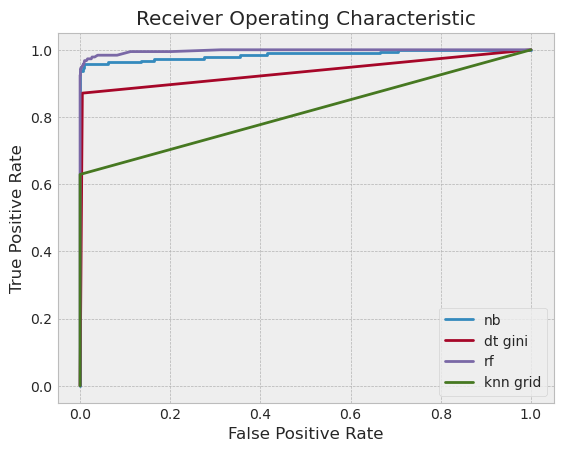

In [90]:
# plot the ROC curve
import matplotlib.pyplot as plt

# Plot ROC curves
plt.plot(fpr_nb, tpr_nb, label='nb')
plt.plot(fpr_dt, tpr_dt, label='dt gini')
plt.plot(fpr_rf, tpr_rf, label='rf')
plt.plot(fpr_knn, tpr_knn, label='knn grid')

# Customize Layout
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()

plt.show()

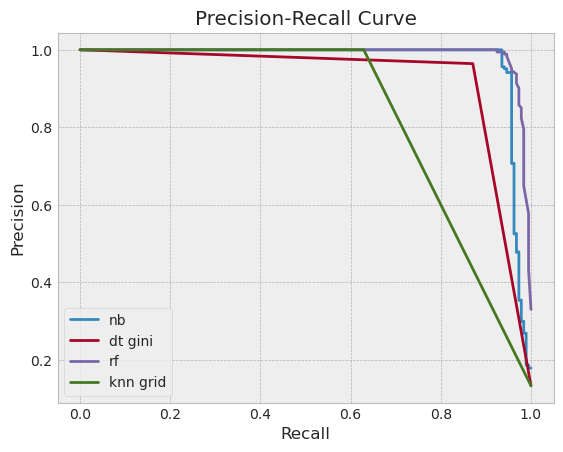

In [91]:
#plot the Precision-Recall curve
# Plot Precision-Recall curves
plt.plot(rec_nb, prec_nb, label='nb')
plt.plot(rec_dt, prec_dt, label='dt gini')
plt.plot(rec_rf, prec_rf, label='rf')
plt.plot(rec_knn, prec_knn, label='knn grid')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()

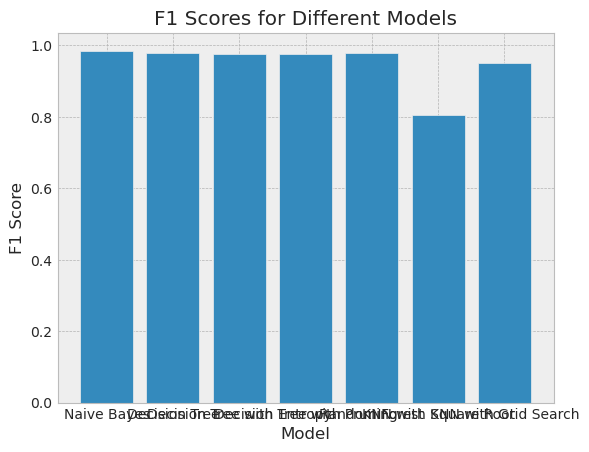

In [87]:
# Plot the F1 scores
plt.bar(model_names, f1_scores)
plt.title("F1 Scores for Different Models")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.show()